In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Load Dataset

In [2]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [3]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

In [4]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

## Forecasting Several Steps Ahead

If we want to predict the next 10 values, instead of just 1, we can modify our previous model to predict the next 10 values. We first need to load the dataset that has sequences with 9 more time steps.

In [5]:
n_steps = 60
series = load('univariate-time-series-multi-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1] # -1 references the last column
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]

In [6]:
#Improve upon this model with your own model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
282/282 [==============================] - 1s 2ms/step - loss: 0.1354 - val_loss: 0.0763
Epoch 2/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0657 - val_loss: 0.0624
Epoch 3/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0575 - val_loss: 0.0581
Epoch 4/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0542 - val_loss: 0.0553
Epoch 5/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0521 - val_loss: 0.0534
Epoch 6/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0506 - val_loss: 0.0521
Epoch 7/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0495 - val_loss: 0.0516
Epoch 8/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0488 - val_loss: 0.0507
Epoch 9/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0482 - val_loss: 0.0497
Epoch 10/20
282/282 [==============================] - 1s 2ms/step - loss: 0.0477 - val_loss: 0.0497

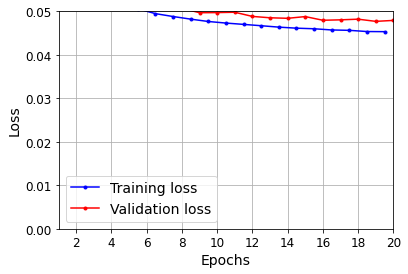

In [7]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

Now let's predict the next 10 values:

In [8]:
series = load('univariate-time-series-multi-step-test.npy')
X_new, Y_new = series[:, :60, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

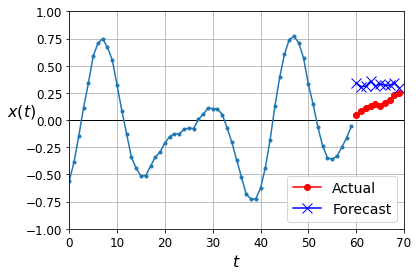

In [9]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0455


0.045478884130716324

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_RNN = keras.models.Sequential([
    keras.layers.LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],1)),
    keras.layers.LSTM(100,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10)
])
print(model_RNN.summary())
model_RNN.compile(loss="mse", optimizer="adam")
history = model_RNN.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 122,210
Trainable params: 122,210
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
282/282 [==============================] - 27s 88ms/step - loss: 0.0900 - val_loss: 0.0462
Epoch 2/20
282/282 [==============================] - 24s 86ms/step - los

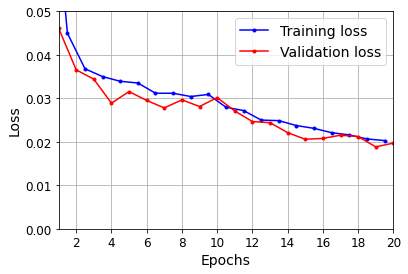

In [12]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [13]:
series = load('univariate-time-series-multi-step-test.npy')
X_new, Y_new = series[:, :60, :], series[:, -10:, :]
Y_pred = model_RNN.predict(X_new)[..., np.newaxis]

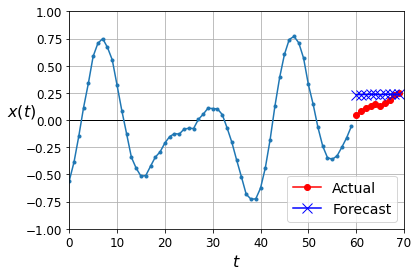

In [14]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [15]:
model_RNN.evaluate(X_test, y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.0176


0.01755773462355137